# State-level Covid-19 Analysis for United States

This notebook utilizes data kindly made available by the New York Times at https://github.com/nytimes/covid-19-data and used for their U.S. tracking page at https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html.  It provides a temporal perspective that complements their excellent geospatial presentation.  

The thing about exponentials with a measurable daily growth rate is they change so fast.  With cases increasing 25% per day,a week means a factor of 5 and a month a factor of a thousand.


* Repo for this and other notebnooks at: [https://github.com/deculler/covid19](https://github.com/deculler/covid19)
* Website for this repo: [https://deculler.github.io/covid19/](https://deculler.github.io/covid19/)

## View and run the notbooks

* [View the notebook with nbviewer](https://nbviewer.jupyter.org/github/deculler/covid19/blob/master/US-covid19-nytimes.ipynb)
* [Launch it on mybinder.org](https://mybinder.org/v2/gh/deculler/covid19/master?filepath=work/US-covid19-nytimes.ipynb)
* [@UCB on datahub.berkeley.edu](http://datahub.berkeley.edu/user-redirect/interact?account=deculler&repo=covid19&branch=master&path=US-covid19-nytimes.ipynb)
  
## Quick links to sections

* [Cases by state](#sectionCases)
* [Deaths by state](#sectionDeaths)
* [Growth trends by state](#sectionGrowth)
* [Projection of cases in one state](#sectionProj)
* [Projection of deaths in one state](#sectionProjDeath)

For dataframes it uses Datascience Tables (for reference see http://data8.org/datascience/tables.html) developed for introductory courses as UCB.

In [17]:
# A week, A month
1.25**7, 1.25**31

(4.76837158203125, 1009.7419586828951)

In [18]:
# HIDDEN
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plots
import numpy as np
import scipy
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact
import ipywidgets as widgets
# datascience version number of last run of this notebook
version.__version__

'0.15.0'

In [19]:
import sys
sys.path.append(".")
from timetable import TimeTable

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

import os
import datetime

# Tools for working with timestamps
day_fmt = "%Y-%m-%d"

def less_day(day1, day2):
    """Return day1 < day2"""
    return datetime.datetime.strptime(day1, day_fmt) < datetime.datetime.strptime(day2, day_fmt)

def format_day(day):
    """Return day """
    date =  datetime.datetime.strptime(day, day_fmt)
    return datetime.datetime.strftime(date, day_fmt)

def inc_day(day, ndays=1):
    """Return day + ndays"""
    date =  datetime.datetime.strptime(day, day_fmt) + datetime.timedelta(days=ndays)
    return datetime.datetime.strftime(date, day_fmt)

def ave_growth(trend, window=4):
    """Average recent growth rate of single trend"""
    vals = [x for x in trend.take[-window:]['rate'] if np.isfinite(x)]
    return scipy.stats.gmean(vals)


def project_trend(trend, num_days, rate=None, window=4):
    if rate :
        growth_rate = rate
    else :
        growth_rate = ave_growth(trend, window)
        
    day = trend.last('date')
    val = trend.last(1)
    growth = trend.last('new')
    pnew = trend.last('% new')
    proj = trend.copy()
    for i in range(num_days):
        day = inc_day(day)
        growth = round(growth * growth_rate)
        val = val + growth
        pnew = growth/val
        proj.append((day, val, growth, pnew, growth_rate))
    return proj

In [20]:
#URL for https://github.com/nytimes/covid-19-data/blob/master/us-states.csv

stateURL = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"

In [21]:
raw_states = Table.read_table(stateURL)
states = list(np.unique(raw_states['state']))

In [22]:
cases = TimeTable.from_table(raw_states.pivot('state', 'date', 'cases', sum), time_col = 'date', 
                             time_less_fun=less_day)
deaths = TimeTable.from_table(raw_states.pivot('state', 'date', 'deaths', sum), time_col = 'date',
                             time_less_fun=less_day)

<a id=sectionCases></a>
## Cases to date by state

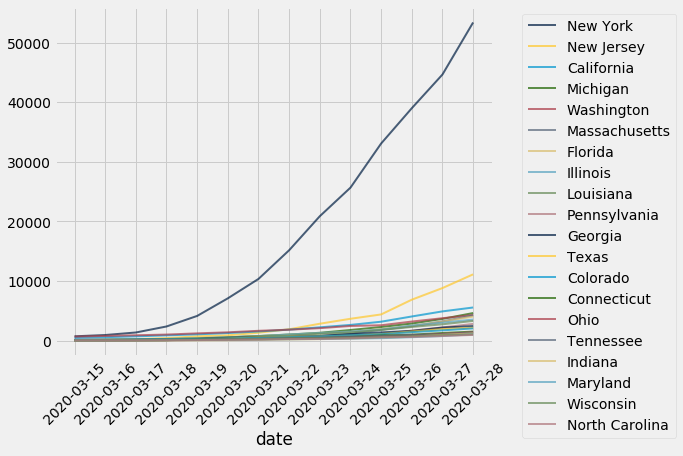

In [23]:
cases.top(20).take[-14:].plot('date', width=7, height=6)
_ = plots.xticks(rotation=45)

<a id='sectionTrends'></a>
## Growth trends by state

In [24]:
cases.order_cols().trend().take[-10:]

date,New York,new New York,% newNew York,rate New York,New Jersey,new New Jersey,% newNew Jersey,rate New Jersey,California,new California,% newCalifornia,rate California,Michigan,new Michigan,% newMichigan,rate Michigan,Washington,new Washington,% newWashington,rate Washington,Massachusetts,new Massachusetts,% newMassachusetts,rate Massachusetts,Florida,new Florida,% newFlorida,rate Florida,Illinois,new Illinois,% newIllinois,rate Illinois,Louisiana,new Louisiana,% newLouisiana,rate Louisiana,Pennsylvania,new Pennsylvania,% newPennsylvania,rate Pennsylvania,Georgia,new Georgia,% newGeorgia,rate Georgia,Texas,new Texas,% newTexas,rate Texas,Colorado,new Colorado,% newColorado,rate Colorado,Connecticut,new Connecticut,% newConnecticut,rate Connecticut,Ohio,new Ohio,% newOhio,rate Ohio,Tennessee,new Tennessee,% newTennessee,rate Tennessee,Indiana,new Indiana,% newIndiana,rate Indiana,Maryland,new Maryland,% newMaryland,rate Maryland,Wisconsin,new Wisconsin,% newWisconsin,rate Wisconsin,North Carolina,new North Carolina,% newNorth Carolina,rate North Carolina,Missouri,new Missouri,% newMissouri,rate Missouri,Arizona,new Arizona,% newArizona,rate Arizona,Virginia,new Virginia,% newVirginia,rate Virginia,Nevada,new Nevada,% newNevada,rate Nevada,Alabama,new Alabama,% newAlabama,rate Alabama,Mississippi,new Mississippi,% newMississippi,rate Mississippi,South Carolina,new South Carolina,% newSouth Carolina,rate South Carolina,Utah,new Utah,% newUtah,rate Utah,Oregon,new Oregon,% newOregon,rate Oregon,Minnesota,new Minnesota,% newMinnesota,rate Minnesota,Arkansas,new Arkansas,% newArkansas,rate Arkansas,Kentucky,new Kentucky,% newKentucky,rate Kentucky,Oklahoma,new Oklahoma,% newOklahoma,rate Oklahoma,District of Columbia,new District of Columbia,% newDistrict of Columbia,rate District of Columbia,Iowa,new Iowa,% newIowa,rate Iowa,Kansas,new Kansas,% newKansas,rate Kansas,Idaho,new Idaho,% newIdaho,rate Idaho,Rhode Island,new Rhode Island,% newRhode Island,rate Rhode Island,Delaware,new Delaware,% newDelaware,rate Delaware,New Hampshire,new New Hampshire,% newNew Hampshire,rate New Hampshire,Maine,new Maine,% newMaine,rate Maine,Vermont,new Vermont,% newVermont,rate Vermont,New Mexico,new New Mexico,% newNew Mexico,rate New Mexico,Hawaii,new Hawaii,% newHawaii,rate Hawaii,Montana,new Montana,% newMontana,rate Montana,Nebraska,new Nebraska,% newNebraska,rate Nebraska,West Virginia,new West Virginia,% newWest Virginia,rate West Virginia,Alaska,new Alaska,% newAlaska,rate Alaska,North Dakota,new North Dakota,% newNorth Dakota,rate North Dakota,Wyoming,new Wyoming,% newWyoming,rate Wyoming,South Dakota,new South Dakota,% newSouth Dakota,rate South Dakota,Guam,new Guam,% newGuam,rate Guam,Puerto Rico,new Puerto Rico,% newPuerto Rico,rate Puerto Rico,Virgin Islands,new Virgin Islands,% newVirgin Islands,rate Virgin Islands
2020-03-19,4152,1770,42.63%,1.74307,735,308,41.90%,1.72131,1067,174,16.31%,1.19485,334,254,76.05%,4.175,1228,202,16.45%,1.19688,328,72,21.95%,1.28125,434,108,24.88%,1.33129,420,134,31.90%,1.46853,392,112,28.57%,1.4,187,48,25.67%,1.34532,282,89,31.56%,1.46114,248,82,33.06%,1.49398,278,62,22.30%,1.28704,159,63,39.62%,1.65625,120,30,25.00%,1.33333,155,57,36.77%,1.58163,56,17,30.36%,1.4359,108,23,21.30%,1.27059,155,49,31.61%,1.46226,104,38,36.54%,1.57576,35,14,40.00%,1.66667,47,19,40.43%,1.67857,94,16,17.02%,1.20513,99,17,17.17%,1.20732,78,27,34.62%,1.52941,50,16,32.00%,1.47059,81,21,25.93%,1.35,80,15,18.75%,1.23077,87,13,14.94%,1.17568,89,12,13.48%,1.15584,62,29,46.77%,1.87879,47,12,25.53%,1.34286,44,15,34.09%,1.51724,68,32,47.06%,1.88889,44,6,13.64%,1.15789,35,13,37.14%,1.59091,23,12,52.17%,2.09091,44,11,25.00%,1.33333,30,4,13.33%,1.15385,44,5,11.36%,1.12821,52,9,17.31%,1.2093,22,3,13.64%,1.15789,35,7,20.00%,1.25,26,10,38.46%,1.625,19,7,36.84%,1.58333,47,4,8.51%,1.09302,5,3,60.00%,2.5,12,3,25.00%,1.33333,19,12,63.16%,2.71429,18,1,5.56%,1.05882,14,3,21.43%,1.27273,12,4,33.33%,1.5,6,1,16.67%,1.2,3,0,0.00%,1
2020-03-20,7102,29

<a id=sectionDeaths></a>
## Deaths to date by state

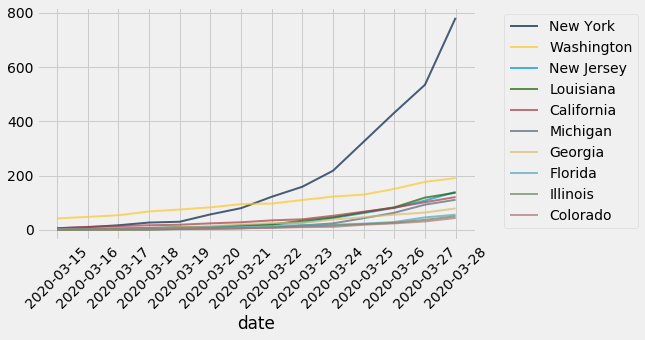

In [25]:
deaths.top(10).take[-14:].plot('date', width=7)
_ = plots.xticks(rotation=45)

<a id='sectionOneState'></a>
## Cases in one state

In [26]:
def show_st(state='California'):
    watch_state = state
    cases.extract(state).trend().take[-10:].show()
    cases.extract(state).trend().select(['date', state, 'new']).take[-20:].plot('date', width=7)
    _ = plots.xticks(rotation=45)

_ = interact(show_st, state=states)

interactive(children=(Dropdown(description='state', index=4, options=('Alabama', 'Alaska', 'Arizona', 'Arkansa…

<a id='sectionProj'></a>
## Projection of cases in one state

In [27]:
def proj_st(state='California'):
    proj = project_trend(cases.extract(state).trend().take[-7:], 14)
    proj.show()
    proj.select(['date', state, 'new']).plot('date', width = 7)
    last = cases['date'][-1]
    plots.plot([last, last], [0, proj[state][-1]])
    _ = plots.xticks(rotation=45)
_ = interact(proj_st, state=states)

interactive(children=(Dropdown(description='state', index=4, options=('Alabama', 'Alaska', 'Arizona', 'Arkansa…

<a id='sectionProjDeath'></a>
## Projection of deaths in one state

In [28]:
def proj_st_deaths(state='California'):
    proj = project_trend(deaths.extract(state).trend().take[-7:], 14)
    proj.show()
    proj.select(['date', state, 'new']).plot('date', width = 7)
    last_day = deaths['date'][-1]
    current = deaths[state]
    last_val = proj[state][-1]
    plots.plot([last_day, last_day], [0, last_val])
    _ = plots.xticks(rotation=45)
    
_ = interact(proj_st_deaths, state=states)

interactive(children=(Dropdown(description='state', index=4, options=('Alabama', 'Alaska', 'Arizona', 'Arkansa…